In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn import datasets, decomposition
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

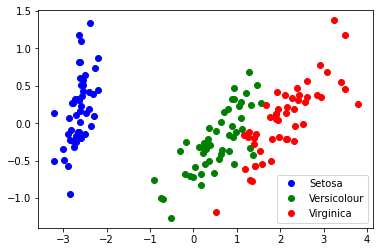

In [5]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], "bo", label="Setosa")
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], "go", label="Versicolour")
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], "ro", label="Virginica")
plt.legend(loc=0);

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [7]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.88889


In [53]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
pca=decomposition.PCA(n_components=10)

In [10]:
X_reduced = pca.fit_transform(X)

In [11]:
f=X[15]

In [12]:
pca=pca.fit(X)

In [54]:
im = pca.inverse_transform(pca.transform(X[20].reshape(1, -1)))

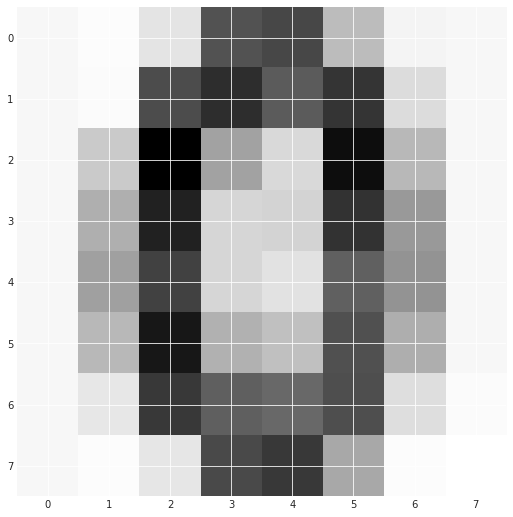

In [55]:
plt.imshow(im.reshape((8, 8)), cmap='binary')

In [94]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50)

In [95]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

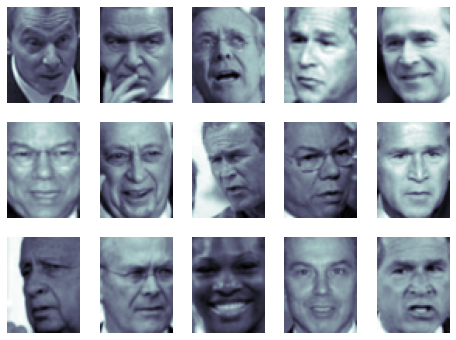

In [96]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [97]:

X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

In [98]:
pca = decomposition.PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

PCA(n_components=100, svd_solver='randomized')

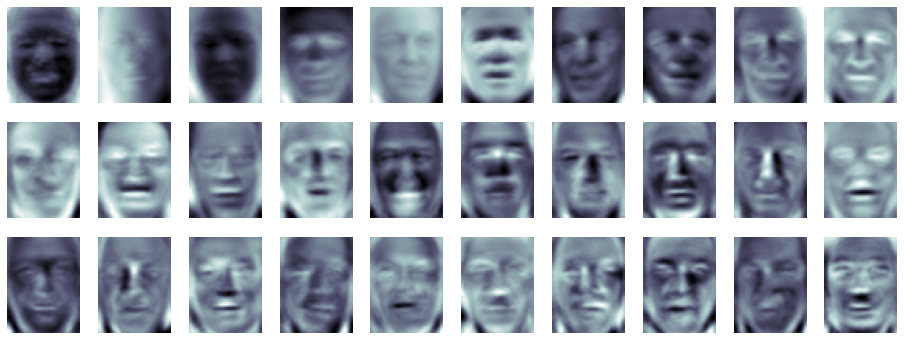

In [99]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((62, 47)), cmap='bone')

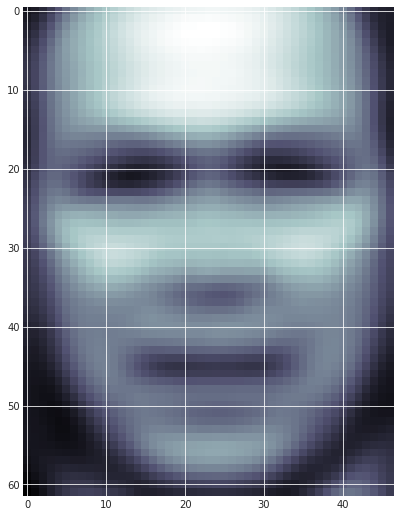

In [78]:
plt.imshow(pca.mean_.reshape((62, 47)), cmap='bone')

In [100]:
from sklearn.svm import LinearSVC

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [105]:
clf.score(X_train_pca,y_train)

0.4598290598290598

Accuracy: 0.458974
                   precision    recall  f1-score   support

     Ariel Sharon       0.27      0.47      0.34        15
     Colin Powell       0.62      0.31      0.41        65
  Donald Rumsfeld       0.24      0.48      0.32        29
    George W Bush       0.87      0.69      0.77       133
Gerhard Schroeder       0.31      0.27      0.29        33
      Hugo Chavez       0.38      0.62      0.48        16
   Jacques Chirac       0.25      0.08      0.12        12
    Jean Chretien       0.09      0.20      0.13        10
    John Ashcroft       0.16      0.28      0.20        18
Junichiro Koizumi       0.54      0.64      0.58        11
  Serena Williams       0.05      0.05      0.05        19
       Tony Blair       0.58      0.38      0.46        29

         accuracy                           0.46       390
        macro avg       0.36      0.37      0.35       390
     weighted avg       0.55      0.46      0.48       390



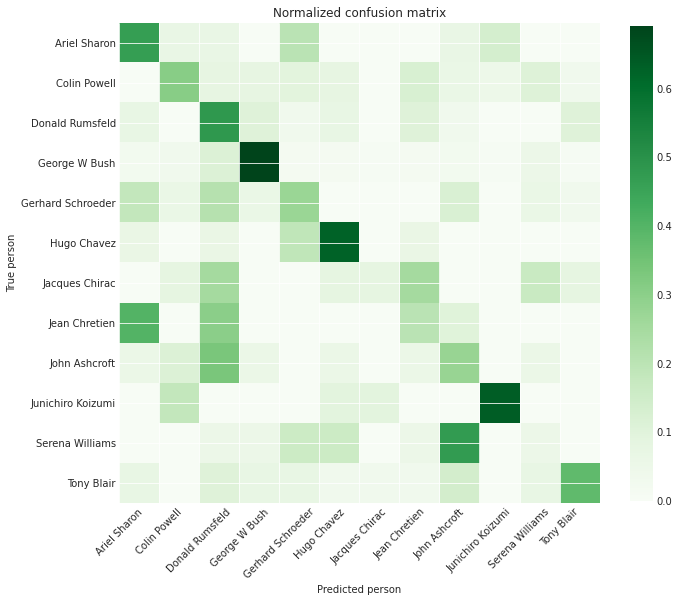

In [106]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

In [72]:
2914/62

47.0

In [15]:
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [117]:
X_train=np.loadtxt('samsung_train.txt')

In [118]:
X_test=np.loadtxt('samsung_test.txt')

In [119]:
y_train=np.loadtxt('samsung_train_labels.txt')

In [120]:
y_test=np.loadtxt('samsung_test_labels.txt')

In [121]:
X=np.concatenate((X_train,X_test))

In [122]:
y=np.concatenate((y_train,y_test)).astype('int')

In [123]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [124]:
scaler=StandardScaler()

In [125]:
X_scale=scaler.fit_transform(X)

In [126]:
(X_scale==X).sum()

0

In [127]:
pca = PCA(0.9).fit(X_scale)

In [128]:
pca.n_components_

65

In [129]:
X_reduced = pca.fit_transform(X)

In [104]:
pca.components_[0]

array([ 0.00032202, -0.00265502, -0.00183102,  0.05640365,  0.05677673,
        0.05438696,  0.05620397,  0.05629792,  0.05394706,  0.05592999,
        0.05495862,  0.05351463, -0.05624353, -0.05559214, -0.05288837,
        0.05768456,  0.051499  ,  0.05197975,  0.04686355,  0.05522047,
        0.05450488,  0.05221183,  0.04846778,  0.05036256,  0.04769178,
       -0.04122402,  0.03408445, -0.02067453,  0.01608156, -0.03273157,
        0.03240098, -0.01038663,  0.00046632, -0.03044505,  0.03181687,
       -0.01485079,  0.00799314, -0.02247826, -0.00283784,  0.01006421,
        0.02404284, -0.03001682, -0.02739536,  0.00884601,  0.01074907,
        0.0120122 ,  0.00891211,  0.01077357,  0.01189365,  0.02473032,
       -0.02943971, -0.02668211,  0.02339869, -0.03047745, -0.02807688,
       -0.007124  ,  0.02370992, -0.02029167, -0.01936607,  0.0092052 ,
        0.01080988,  0.01145887,  0.02344876, -0.01416243, -0.0017441 ,
       -0.0081702 ,  0.01468666, -0.02093452,  0.02646854,  0.01

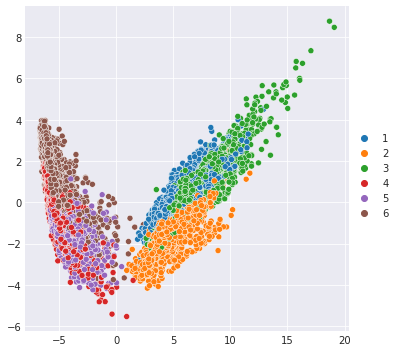

In [138]:
sns.relplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='tab10', kind='scatter')

In [133]:
np.unique(list(y))

array([1, 2, 3, 4, 5, 6])

In [24]:
kmeans = KMeans(n_clusters=6, random_state=17,n_init=100).fit(X_reduced)

In [25]:
y_kmeans = kmeans.predict(X_reduced)

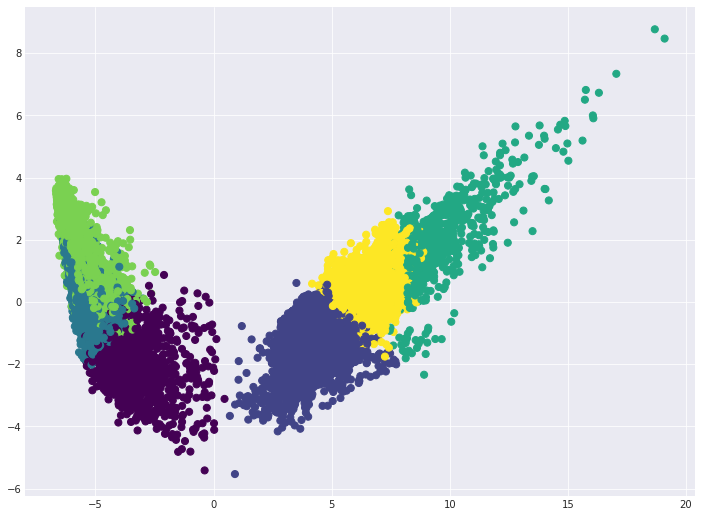

In [145]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [165]:
tab = pd.crosstab(y,y_kmeans, margins=True)

In [166]:
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']

In [167]:
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']

In [168]:
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,707,0,150,0,865,1722
подъем вверх по лестнице,0,1171,0,82,0,291,1544
спуск по лестнице,0,188,0,457,0,761,1406
сидение,470,3,1255,0,49,0,1777
стояние,666,0,1240,0,0,0,1906
лежание,173,12,0,0,1759,0,1944
все,1309,2081,2495,689,1808,1917,10299


In [169]:
865/(707+150)

1.0093348891481915

In [170]:
1171/(82+291)

3.1394101876675604

In [171]:
1759/(173+12)

9.508108108108107

In [172]:
1759/1944

0.904835390946502

In [22]:
inertia = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

In [23]:
inertia

[1469.3730945680968,
 1383.6978057184679,
 1315.3632698660897,
 1268.7088622398835]

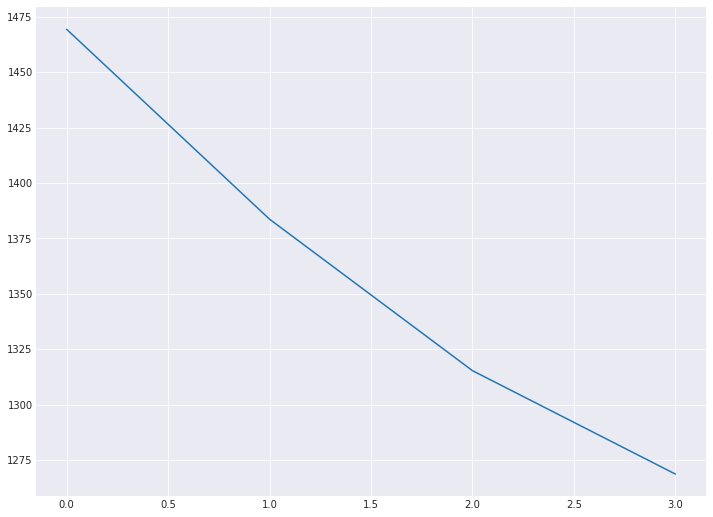

In [24]:
plt.plot(inertia)

In [16]:
ag = AgglomerativeClustering(n_clusters=6, 
                             linkage='ward').fit_predict(X_reduced)

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [21]:
Z = hierarchy.linkage(X, 'single')
a=hierarchy.fcluster(Z,1,depth=5)
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(a)
plt.show()

TypeError: Linkage matrix 'Z' must contain doubles.

<Figure size 1800x720 with 0 Axes>

In [21]:
ag.labels_

array([4, 0, 0, ..., 2, 2, 2], dtype=int32)

In [186]:
10299*36

370764

In [28]:
metrics.adjusted_rand_score(ag.labels_,y)

0.5079060462877689

In [29]:
metrics.adjusted_rand_score(y_kmeans,y)

0.4612011937247246

In [30]:
y

array([5, 5, 5, ..., 2, 2, 2])

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [50]:
search=GridSearchCV(svc,svc_params,cv=3,n_jobs=-1)

In [ ]:
search.fit(X_train_scaled,y_train).best_score_

In [38]:
y_predicted = search.predict(X_test_scaled)

In [39]:
y_predicted

array([5., 5., 5., ..., 2., 2., 2.])

In [40]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,389,55,9,19,24,0,496
подъем вверх по лестнице,0,465,1,5,0,0,471
спуск по лестнице,0,13,373,11,23,0,420
сидение,2,5,0,352,131,1,491
стояние,2,2,0,11,517,0,532
лежание,0,0,1,33,9,494,537
все,393,540,384,431,704,495,2947


In [11]:
pd.Series([389/496,
465/471,
373/420,
352/491,
517/532,
494/537]).mean()

0.8780441464181102

In [23]:
pca=PCA(0.9)

In [24]:
X_test_reduced=pca.fit_transform(X_test_scaled)

In [25]:
X_train_reduced=pca.fit_transform(X_train_scaled)

In [26]:
search=GridSearchCV(svc,svc_params,cv=3)

In [27]:
search.fit(X_train_reduced,y_train).best_score_

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\user\appdata\local\

0.8998943094169531

In [26]:
import matplotlib.image as mpimg

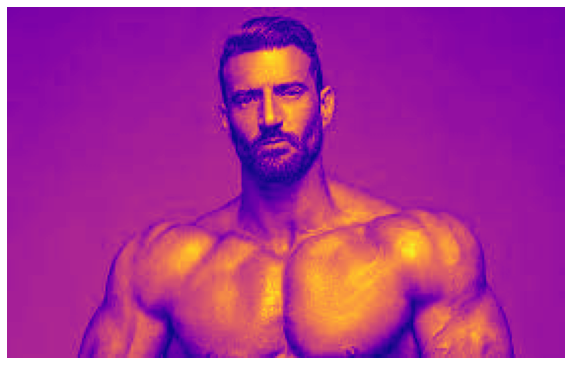

In [49]:
img = mpimg.imread('man.jpg')[..., 1]
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img, cmap='plasma');

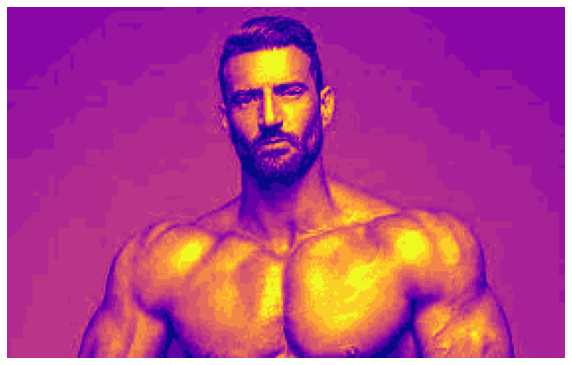

In [52]:

from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=15)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'plasma');

In [39]:
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


In [49]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


In [50]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
km.fit(X)

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)


KMeans(max_iter=100, n_clusters=4, n_init=1)

In [51]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [52]:
order_centroids

array([[471, 802, 514, ..., 472, 475,   0],
       [380, 926, 192, ..., 422, 686, 999],
       [371, 192, 651, ..., 704, 715, 999],
       [830, 588,  46, ..., 636, 385, 822]], dtype=int32)

In [53]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: keith sgi livesey caltech jon solntze wpd com schneider cco
Cluster 2: graphics university com posting thanks host nntp image ac computer
Cluster 3: god com people sandvik jesus article don christian say just
Cluster 4: space nasa access henry digex gov pat toronto com alaska


In [56]:
terms[450]

'islam'

In [58]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [69]:
kmeans=KMeans(n_clusters=5)

In [70]:
kmeans.fit(X)

KMeans(n_clusters=5)

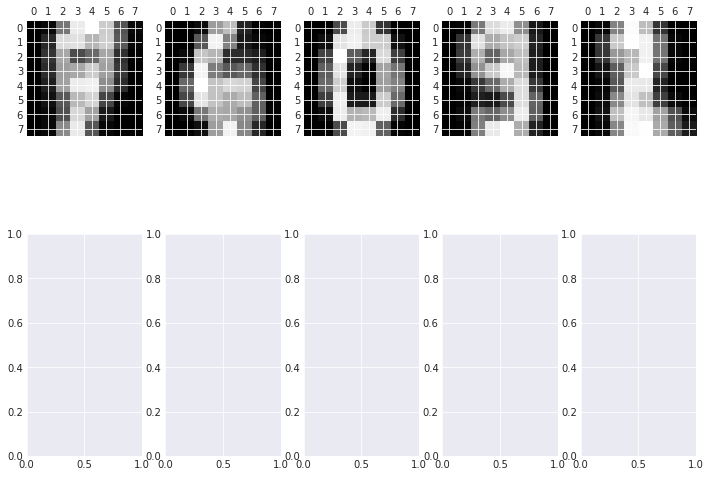

In [71]:
_, axes = plt.subplots(2, 5)
for ax,elem in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(elem.reshape(8, 8), cmap=plt.cm.gray)